This notebook uses the plots from the following paper to explain Matplotlib is Carsen Stringer, Marius Pachitariu, Nicholas Steinmetz, Matteo Carandini, Kenneth D. Harris, "High-dimensional geometry of population responses in visual cortex", Nature, 2018.

The official repository for the code related to this paper is here: https://github.com/MouseLand/stringer-pachitariu-et-al-2018b

Data for this notebook can be downloaded from https://figshare.com/articles/dataset/Recordings_of_ten_thousand_neurons_in_visual_cortex_in_response_to_2_800_natural_images/6845348

# Importing necessary libraries

In [1]:
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np

# Opening .mat data in Python and first plot

We load a \*.mat file containing data into a numpy array and make a fist plot.

In [8]:
import scipy.io as sio
mt = sio.loadmat('natimg2800_M160825_MP027_2016-12-14.mat')

### stimulus responses
resp = mt['stim'][0]['resp'][0]    # stimuli by neurons
istim = mt['stim'][0]['istim'][0]   # identities of stimuli in resp
spont = mt['stim'][0]['spont'][0]  # timepoints by neurons

It is useful to plot shapes of the loaded numpy arrays using .shape

In [9]:
print('Shape of neural response array: {}'.format(resp.shape))
print('Shape of stimulus identity response array: {}'.format(istim.shape))
print('Shape of spontaneous activity array: {}'.format(spont.shape))

Shape of neural response array: (5426, 11449)
Shape of stimulus identity response array: (5426, 1)
Shape of spontaneous activity array: (4696, 11449)


Plot the response of one neuron for 500 first timepoints.

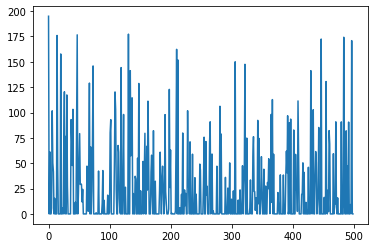

In [10]:
plt.plot(resp[:500,0])

Load stimuli as images using plt.imshow.

In [ ]:
### loading images
mt = sio.loadmat('images_natimg2800_all.mat')
imgs = mt['imgs']  # 68 by 270 by number of images
# check out first image using matplotlib.pyplot
plt.imshow(imgs[:,:,0])